In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
import pandas as pd

symbols = ['AAPL', 'MSFT', 'KO', 'AMZN', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()
for sym in symbols:
    data[sym] = yf.download(sym, start = '2020-01-01')['Close']
data.columns = symbols


/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argu

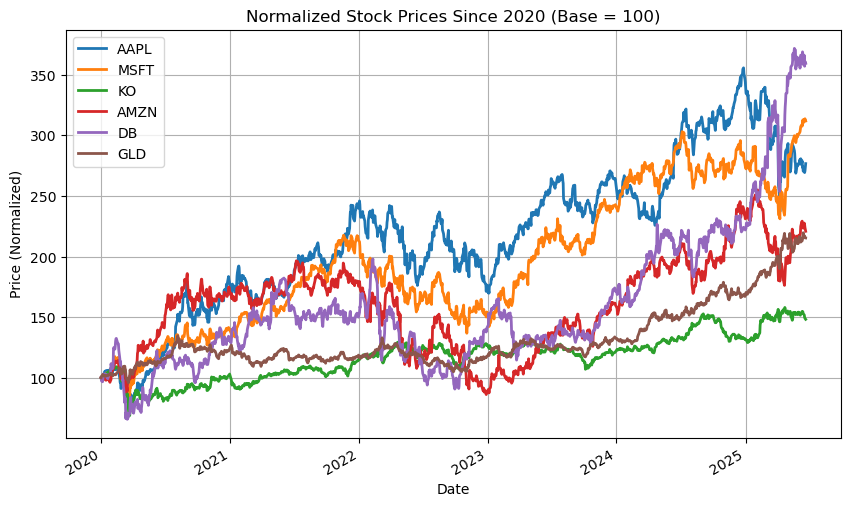

In [4]:
normed = data / data.iloc[0] * 100

# Plot
normed.plot(figsize=(10, 6), linewidth=2)
plt.title('Normalized Stock Prices Since 2020 (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Price (Normalized)')
plt.grid(True)
plt.legend()
plt.show()
